<a href="https://colab.research.google.com/github/Luanmantegazine/Processamento-de-imagens-OpenCV/blob/main/Classification_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASSIFICAÇÃO DE ESTAGIOS DA DOENÇA DE ALZHEIMER USANDO TRÊS REDES NEURAIS

In [ ]:
import torch
import torch.nn as nn
import collections
import pandas as pd
import numpy as np
from matplotlib.image import imread
import os

IMAGE TO CSV

In [ ]:
base_dir = '/content/drive/MyDrive/Dataset'
print(os.listdir(base_dir))

def image_to_csv(folder_name):

    single_image_dir = base_dir+'/'+folder_name
    images = os.listdir(single_image_dir)
    li =[]
    for image in images:
        single_image = single_image_dir+'/'+image
        img_arr = imread(single_image)
        reshape = img_arr.reshape((-1,))
        li.append(reshape)

    mild = np.array(li)

    sub_df = pd.DataFrame(mild)
    if folder_name == "Mild_Demented":
        sub_df['target'] = 0
    elif folder_name == "Moderate_Demented":
        sub_df['target'] = 1
    elif folder_name == "Non_Demented":
        sub_df['target'] = 2
    elif folder_name == "Very_Mild_Demented":
        sub_df['target'] = 3
    return sub_df

mild_df = image_to_csv("Mild_Demented")
moderate_df = image_to_csv("Moderate_Demented")
non_df = image_to_csv("Non_Demented")
very_df = image_to_csv("Very_Mild_Demented")
df = pd.concat([mild_df, moderate_df, non_df, very_df])
df.shape

print(df['target'].value_counts())

df.to_csv("ad_dataset.csv")

['Moderate_Demented', 'Very_Mild_Demented', 'Mild_Demented', 'Non_Demented']
target
2    3200
3    2240
0     896
1      64
Name: count, dtype: int64


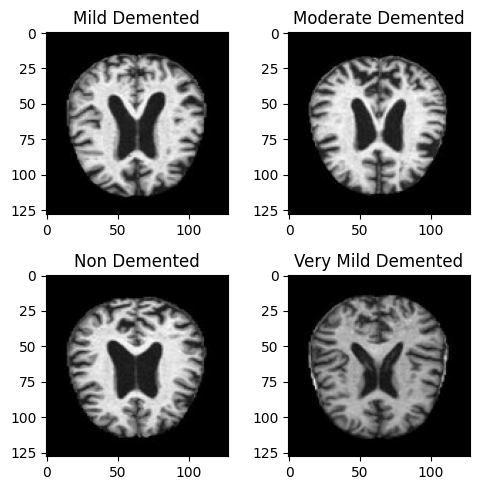

In [ ]:
import matplotlib.pyplot as plt


mild_image = mild_df.iloc[0,:-1].values.reshape((128, 128))  # Exemplo: pegando a primeira imagem de Mild_Demented
moderate_image = moderate_df.iloc[0,:-1].values.reshape((128, 128))  # Exemplo: pegando a primeira imagem de Moderate_Demented
non_image = non_df.iloc[0,:-1].values.reshape((128, 128))  # Exemplo: pegando a primeira imagem de Non_Demented
very_image = very_df.iloc[0,:-1].values.reshape((128, 128))  # Exemplo: pegando a primeira imagem de Very_Mild_Demented

plt.figure(figsize=(5, 5))

plt.subplot(221)
plt.imshow(mild_image, cmap='gray')
plt.title('Mild Demented')

plt.subplot(222)
plt.imshow(moderate_image, cmap='gray')
plt.title('Moderate Demented')

plt.subplot(223)
plt.imshow(non_image, cmap='gray')
plt.title('Non Demented')

plt.subplot(224)
plt.imshow(very_image, cmap='gray')
plt.title('Very Mild Demented')

plt.tight_layout()
plt.show()

In [ ]:
!pip install tensorflow_addons


In [ ]:
!pip install tensorflow-federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.5/262.5 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 36.0 MB/s eta 0:00:00
     ━━

In [ ]:
import seaborn as sns
import tensorflow as tf
#import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import tensorflow_addons as tfa
#from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D
import tensorflow_federated as tff

np.random.seed(0)
import nest_asyncio
nest_asyncio.apply()

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


['Moderate_Demented', 'Very_Mild_Demented', 'Mild_Demented', 'Non_Demented']
Found 6400 images belonging to 4 classes.
(5500, 75, 75, 3) (5500, 4)
(12800, 75, 75, 3) (12800, 4)
Epoch 1/100
256/256 [==============================] - 19s 16ms/step - loss: 1.6991 - acc: 0.2686 - auc: 0.5259 - val_loss: 1.3893 - val_acc: 0.2490 - val_auc: 0.4980
Epoch 2/100
256/256 [==============================] - 3s 12ms/step - loss: 1.3873 - acc: 0.3287 - auc: 0.6087 - val_loss: 1.5810 - val_acc: 0.2490 - val_auc: 0.5341
Epoch 3/100
256/256 [==============================] - 4s 14ms/step - loss: 1.0059 - acc: 0.5410 - auc: 0.8138 - val_loss: 2.6968 - val_acc: 0.2402 - val_auc: 0.5544
Epoch 4/100
256/256 [==============================] - 4s 17ms/step - loss: 0.7753 - acc: 0.6425 - auc: 0.8884 - val_loss: 0.9463 - val_acc: 0.5103 - val_auc: 0.8383
Epoch 5/100
256/256 [==============================] - 3s 12ms/step - loss: 0.7161 - acc: 0.6770 - auc: 0.9056 - val_loss: 0.9136 - val_acc: 0.5547 - val_auc:

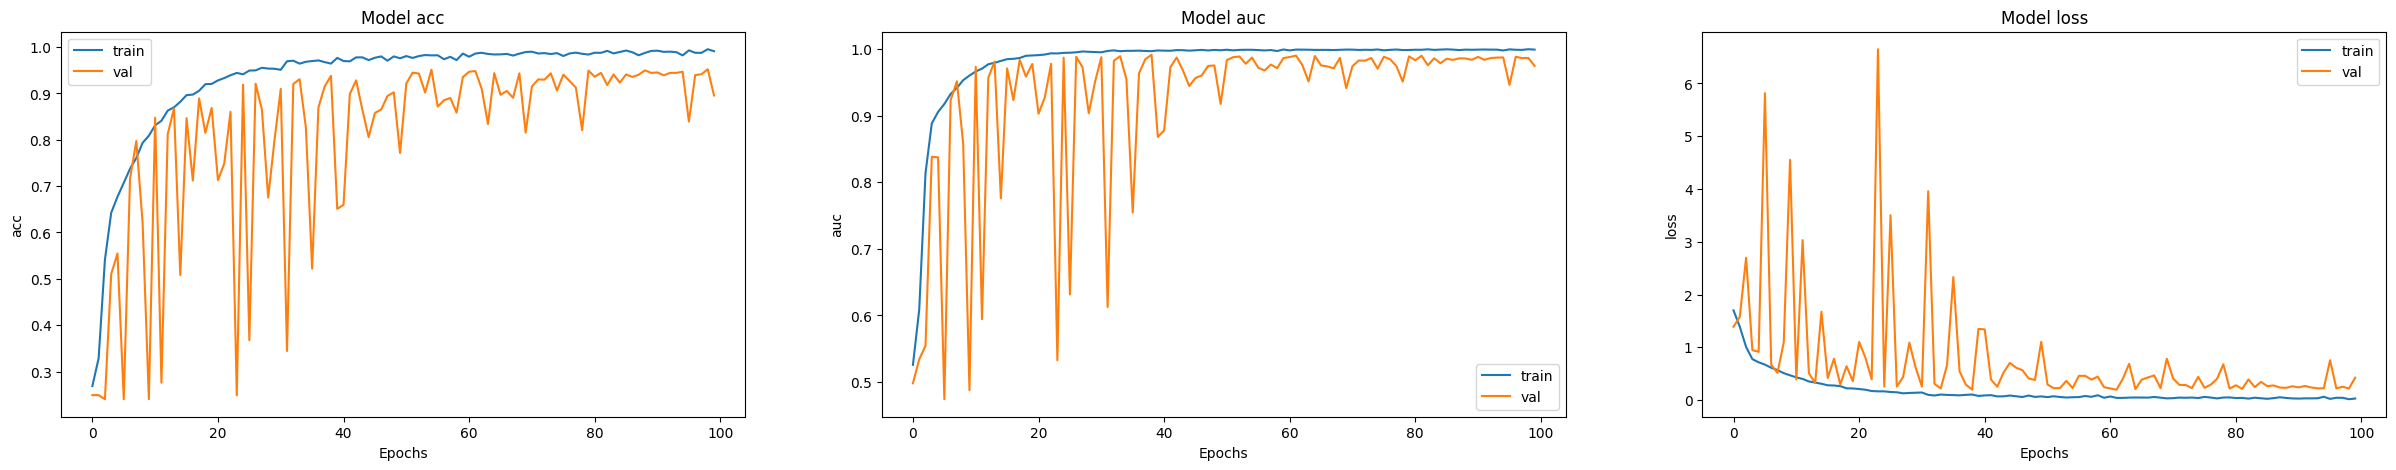

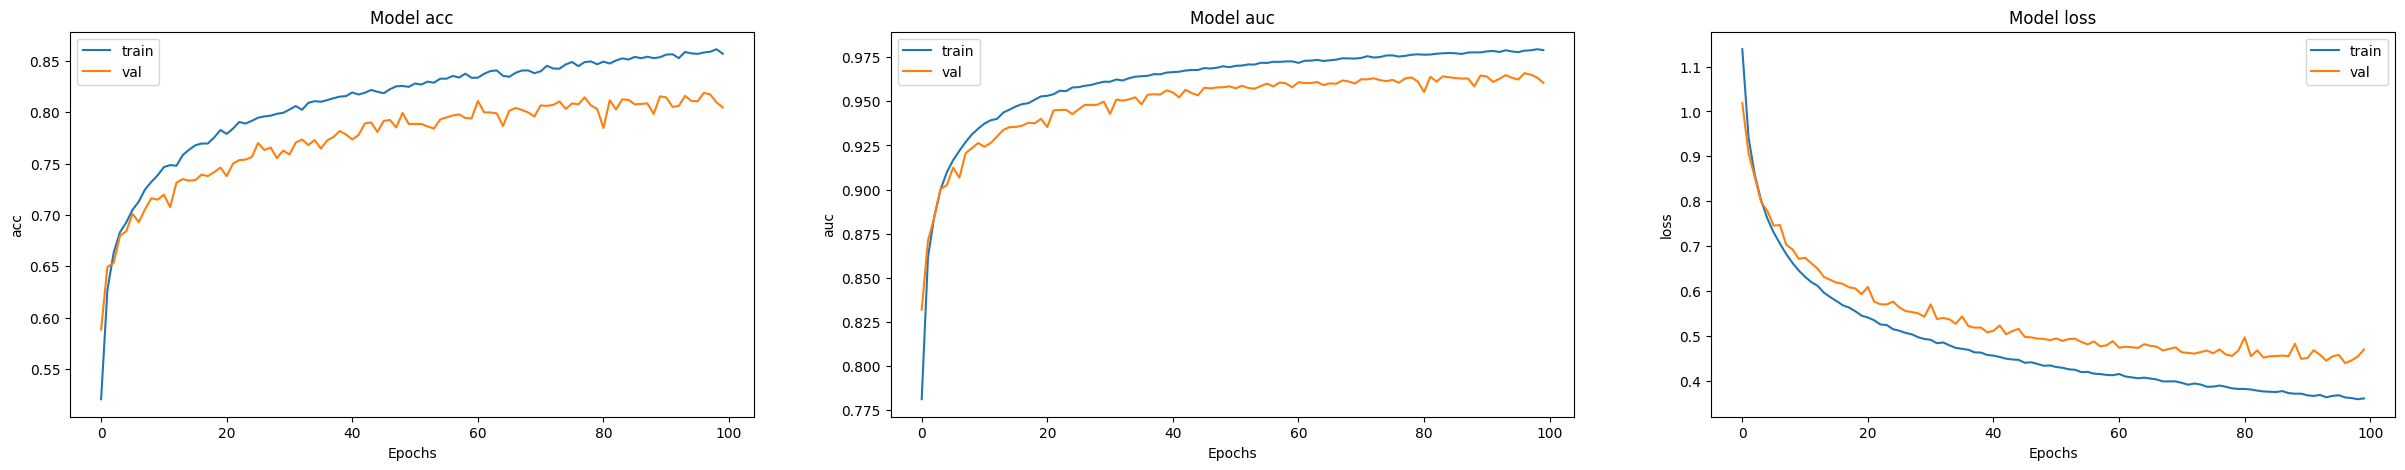

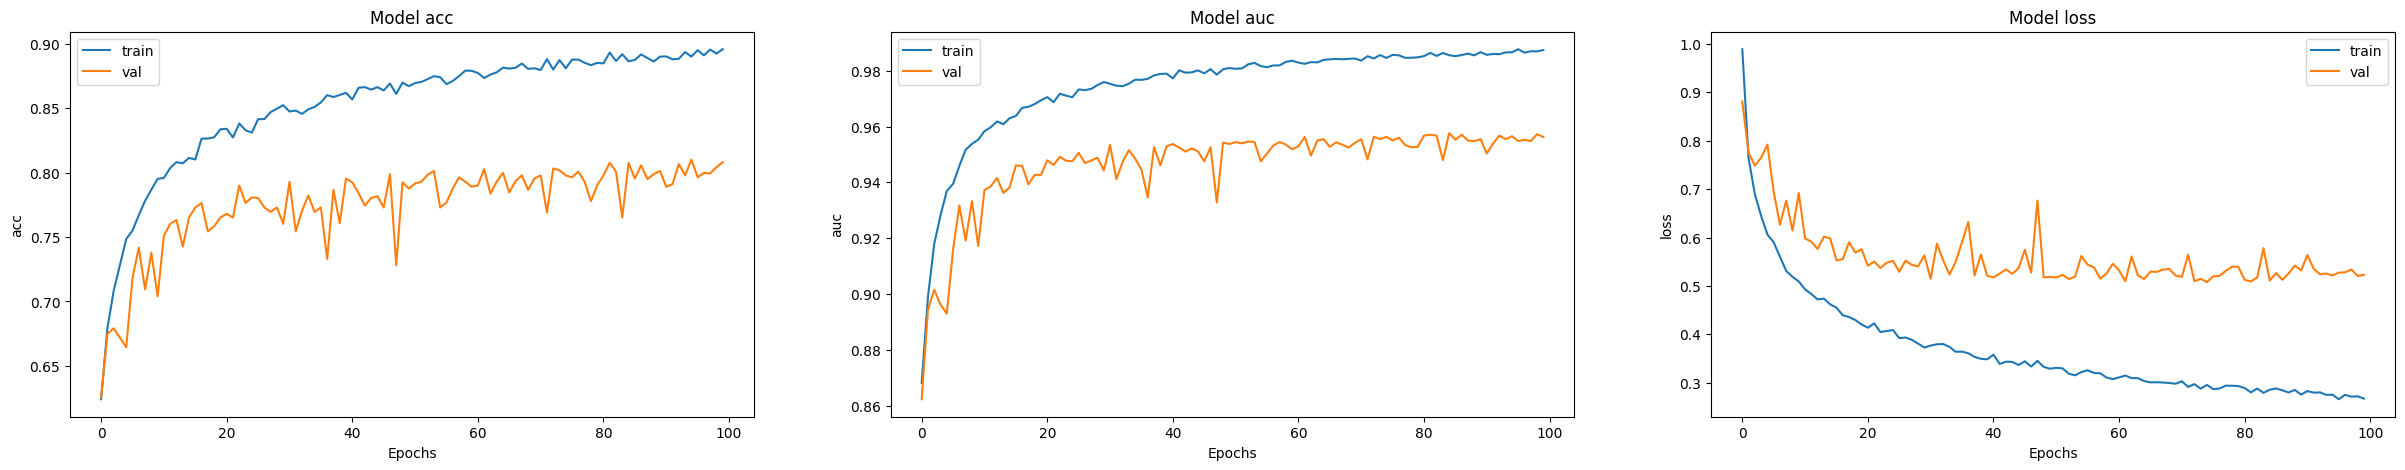

In [ ]:
base_dir = '/content/drive/MyDrive/Dataset'
print(os.listdir(base_dir))

WORK_DIR = base_dir
CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']
IMG_SIZE = 75
#IMAGE_SIZE = [75, 75]
DIM = (IMG_SIZE, IMG_SIZE)

work_dr = ImageDataGenerator(rescale = 1.0/255, brightness_range=[0.8, 1.2],
                             zoom_range=[.99, 1.01], data_format="channels_last",
                             fill_mode="constant",
                             horizontal_flip=True)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=5500, shuffle=False)

train_data, train_labels = train_data_gen.next()

print(train_data.shape, train_labels.shape)
sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(train_data.shape, train_labels.shape)

train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels,
                                                                    test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                                  test_size = 0.2, random_state=42)


# In[10]:


from tensorflow import keras
model = keras.models.Sequential([
keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3), padding='same'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (2, 2), activation='relu', padding='same'),
keras.layers.MaxPooling2D(),

keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),

keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.7),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.3),

keras.layers.Dense(4, activation ='softmax')])

# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file=base_dir + "model_plot.png", show_shapes=True, show_layer_names=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=6)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'),
          ]

model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

EPOCHS = 100

history = model.fit(train_data, train_labels,
                    validation_data=(val_data, val_labels),
                     epochs=EPOCHS)

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

# VGG16 model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

vgg = VGG16(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'), ]

CALLBACKS = [early_stopping]

modelvgg.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

history = modelvgg.fit(train_data, train_labels,
                    validation_data=(val_data, val_labels), epochs=100)

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

print(modelvgg.evaluate(test_data, test_labels))

# inception v3 model
inception = InceptionV3(input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False
x = Flatten()(inception.output)

prediction = Dense(4, activation='softmax')(x)

inception_v3 = Model(inputs=inception.input, outputs=prediction)
inception_v3.summary()

inception_v3.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

EPOCHS = 100

history = inception_v3.fit(train_data, train_labels,
                    validation_data=(val_data, val_labels), epochs=EPOCHS)

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

print(inception_v3.evaluate(test_data, test_labels))

# resnet
from tensorflow.keras.applications.resnet50 import ResNet50

res = ResNet50(input_shape=(75,75,3), weights='imagenet', include_top=False)
for layer in res.layers:
    layer.trainable = False
x = Flatten()(res.output)

prediction = Dense(4, activation='softmax')(x)

res50 = Model(inputs=res.input, outputs=prediction)

res50.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

EPOCHS = 100
history_50 = res50.fit(train_data, train_labels,
                    validation_data=(val_data, val_labels),
                     epochs=EPOCHS,)

print( res50.evaluate(test_data, test_labels))

(6400, 16384)


<ipython-input-5-65d5d98a3b5f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="mako_r")


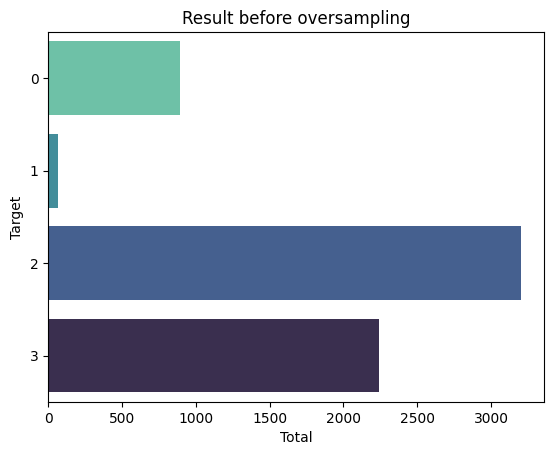

<ipython-input-5-65d5d98a3b5f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="mako_r")


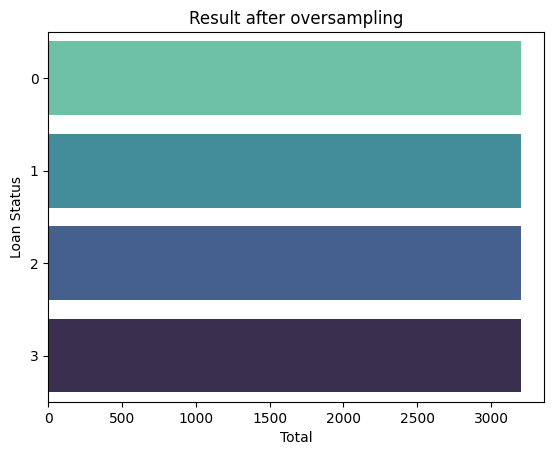

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               8389120   
                                                                 
 batch_normalization_100 (B  (None, 512)               2048      
 atchNormalization)                                              
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_101 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                                 
 dropout_6 (Dropout)         (None, 256)              

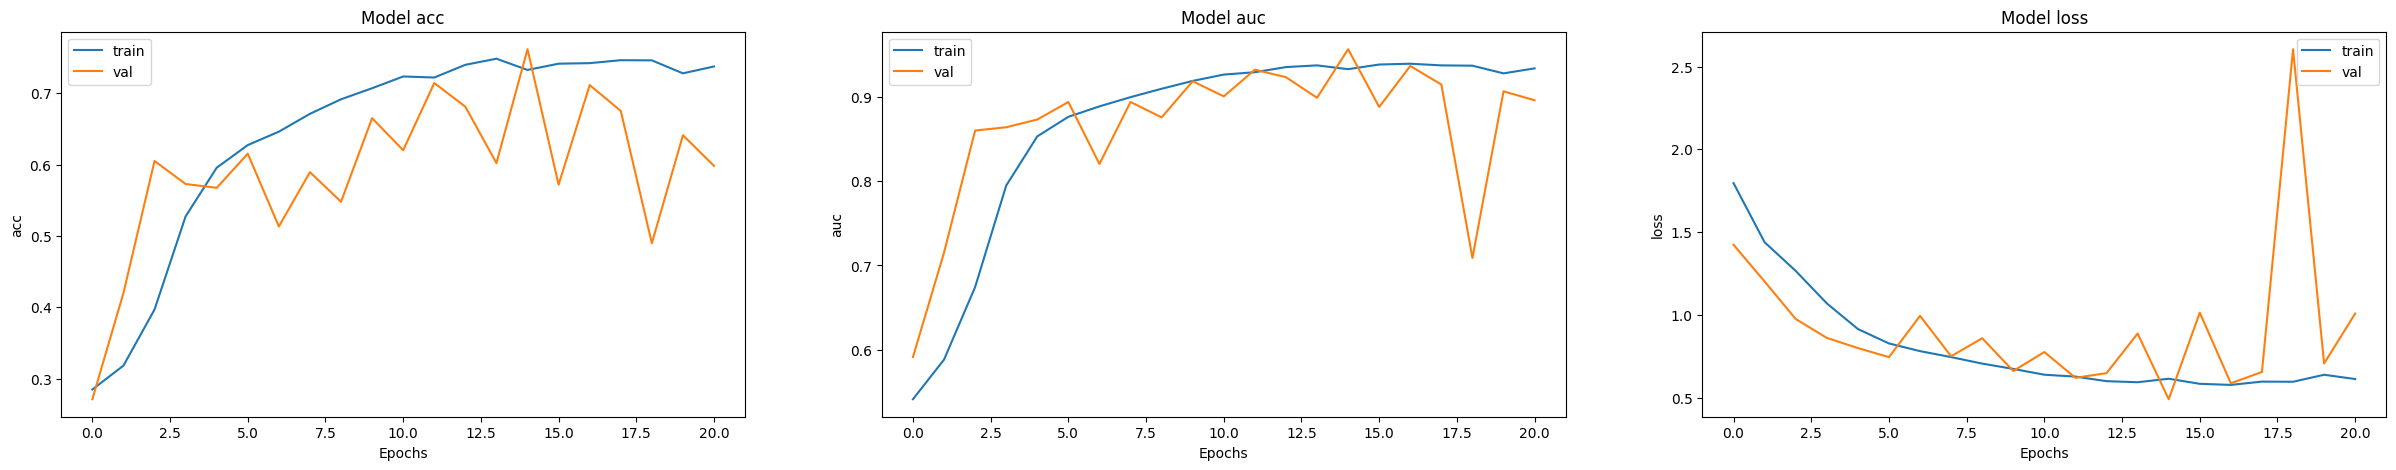

80/80 [==============================] - 1s 7ms/step - loss: 0.9959 - acc: 0.6109 - auc: 0.8962
[0.9959050416946411, 0.6109374761581421, 0.8962231278419495]


In [ ]:
df = pd.read_csv('ad_dataset.csv')
df = df.drop('Unnamed: 0', axis=1)

X = df.drop('target', axis=1)
y = df['target']
print(X.shape)

import seaborn as sns
sns.countplot(y=y, data=df, palette="mako_r")
plt.title("Result before oversampling")
plt.ylabel('Target')
plt.xlabel('Total')
plt.show()

from imblearn.over_sampling import SMOTE

nm = SMOTE()
X, y = nm.fit_resample(X, y)

sns.countplot(y=y, data=df, palette="mako_r")
plt.title("Result after oversampling")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

train_data, test_data, train_labels, test_labels = train_test_split(X, y,
                                                                    test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                                  test_size = 0.2, random_state=42)

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

n_cols = train_data.shape[1]


early_stopping = EarlyStopping(monitor='val_loss', patience=6)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

model = Sequential()
model.add(Dense(512, input_shape=(n_cols,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(4, activation='softmax'))

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'),
          ]

CALLBACKS = [early_stopping,reduce_lr]

model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

EPOCHS = 100

history = model.fit(train_data, train_labels,
                    validation_data=(val_data, val_labels),
                    callbacks=CALLBACKS, epochs=EPOCHS, batch_size=32)

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])
plt.show()

print(model.evaluate(test_data, test_labels))